# (4) Training and Validation

In [11]:
import tensorflow as tf
import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import os
import h5py
import pandas as pd
import numpy as np
import pickle

In [12]:
Inputs = Input(shape=(16,))
x = Dense(64, activation='relu', kernel_initializer='lecun_uniform', name='fc1_relu')(Inputs)
y = Dense(32, activation='relu', kernel_initializer='lecun_uniform', name = 'fc2')(x)
z = Dense(32, activation='relu', kernel_initializer='lecun_uniform', name = 'fc3')(y)
a = Dense(32, activation='relu', kernel_initializer='lecun_uniform', name='fc4')(z)
predictions = Dense(5, activation='sigmoid', kernel_initializer='lecun_uniform', name = 'output_sigmoid')(a)
model = Model(inputs=Inputs, outputs=predictions)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
fc1_relu (Dense)             (None, 64)                1088      
_________________________________________________________________
fc2 (Dense)                  (None, 32)                2080      
_________________________________________________________________
fc3 (Dense)                  (None, 32)                1056      
_________________________________________________________________
fc4 (Dense)                  (None, 32)                1056      
_________________________________________________________________
output_sigmoid (Dense)       (None, 5)                 165       
Total params: 5,445
Trainable params: 5,445
Non-trainable params: 0
_________________________________________________________

In [13]:

f = h5py.File('processed-pythia82-lhc13-all-pt1-50k-r1_h022_e0175_t220_nonu_withPars_truth_0.z', 'r')
treeArray = f['t_allpar_new'][()]

features = ['j_zlogz', 'j_c1_b0_mmdt','j_c1_b1_mmdt', 'j_c1_b2_mmdt' , 'j_c2_b1_mmdt',
            'j_c2_b2_mmdt', 'j_d2_b1_mmdt', 'j_d2_b2_mmdt', 'j_d2_a1_b1_mmdt', 'j_d2_a1_b2_mmdt', 'j_m2_b1_mmdt', 'j_m2_b2_mmdt', 'j_n2_b1_mmdt', 
            'j_n2_b2_mmdt', 'j_mass_mmdt', 'j_multiplicity']
labels = ['j_g', 'j_q', 'j_w', 'j_z', 'j_t']
features_labels_df = pd.DataFrame(treeArray, columns = features + labels)
features_labels_df = features_labels_df.drop_duplicates()
features_val = features_labels_df[features].values

labels_val = features_labels_df[labels].values

X_train, X_test, y_train, y_test = train_test_split(features_val,labels_val,test_size = 0.2, random_state = 42)


In [15]:
features_val

array([[-2.58173513e+00,  3.60516220e-01,  6.66159065e-03, ...,
         2.37902060e-01,  9.11875439e+00,  5.10000000e+01],
       [-2.52301788e+00,  4.17621464e-01,  2.75651854e-03, ...,
         2.70587593e-01,  4.91627884e+00,  5.00000000e+01],
       [-3.25055408e+00,  4.75789398e-01,  4.47523482e-02, ...,
         6.44261613e-02,  9.30914459e+01,  4.10000000e+01],
       ...,
       [-3.02877426e+00,  4.67739254e-01,  1.06122434e-01, ...,
         2.10040629e-01,  1.81831253e+02,  3.90000000e+01],
       [-3.04100394e+00,  4.64421332e-01,  4.85292822e-02, ...,
         6.81648776e-02,  9.07522278e+01,  4.40000000e+01],
       [-3.52587104e+00,  4.74667460e-01,  9.52999294e-02, ...,
         1.70399264e-01,  2.04508606e+02,  8.30000000e+01]], dtype=float32)

In [16]:
X_test.shape

(19754, 16)

In [17]:
y_test.shape

(19754, 5)

In [18]:
z = np.append(X_test,y_test, axis = 1)

In [19]:
z.shape

(19754, 21)

In [20]:
z.shape

(19754, 21)

In [21]:
pickle.dump(z, open('robfile.pkl', 'w'))

TypeError: write() argument must be str, not bytes

In [22]:
filename = 'robfile.pkl'

In [23]:
with open(filename, 'wb') as filehandler:
    pickle.dump(z, filehandler)

In [24]:
features_labels_df.columns.values

array(['j_zlogz', 'j_c1_b0_mmdt', 'j_c1_b1_mmdt', 'j_c1_b2_mmdt',
       'j_c2_b1_mmdt', 'j_c2_b2_mmdt', 'j_d2_b1_mmdt', 'j_d2_b2_mmdt',
       'j_d2_a1_b1_mmdt', 'j_d2_a1_b2_mmdt', 'j_m2_b1_mmdt',
       'j_m2_b2_mmdt', 'j_n2_b1_mmdt', 'j_n2_b2_mmdt', 'j_mass_mmdt',
       'j_multiplicity', 'j_g', 'j_q', 'j_w', 'j_z', 'j_t'], dtype=object)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(features_val, labels_val, test_size=0.2, random_state=42)

In [5]:
y_train.shape

(79015, 5)

## Training

In [6]:
y_train.shape

(79015, 5)

In [13]:
adam = Adam(lr=0.02)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history2 = model.fit(X_train, y_train, batch_size = 1024, epochs = 100, 
                    validation_split = 0.25, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

Epoch 1/100
58/58 [==============================] - 1s 16ms/step - loss: 0.7133 - accuracy: 0.3747 - val_loss: 0.4113 - val_accuracy: 0.4375
Epoch 2/100
58/58 [==============================] - 1s 15ms/step - loss: 0.3876 - accuracy: 0.5416 - val_loss: 0.3686 - val_accuracy: 0.5513
Epoch 3/100
58/58 [==============================] - 1s 17ms/step - loss: 0.3545 - accuracy: 0.6270 - val_loss: 0.3439 - val_accuracy: 0.6207
Epoch 4/100
58/58 [==============================] - 1s 14ms/step - loss: 0.3423 - accuracy: 0.6330 - val_loss: 0.3377 - val_accuracy: 0.6307
Epoch 5/100
58/58 [==============================] - 1s 17ms/step - loss: 0.3407 - accuracy: 0.6329 - val_loss: 0.3346 - val_accuracy: 0.6256
Epoch 6/100
58/58 [==============================] - 1s 18ms/step - loss: 0.3346 - accuracy: 0.6404 - val_loss: 0.3207 - val_accuracy: 0.6756
Epoch 7/100
58/58 [==============================] - 1s 17ms/step - loss: 0.3286 - accuracy: 0.6524 - val_loss: 0.3180 - val_accuracy: 0.6725
Epoch 

In [ ]:
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 400, 
                    validation_split = 0.25, shuffle = True, callbacks = None,
                    use_multiprocessing=True, workers=4)

In [21]:
model.save('4-layer') #Saves to local directory; model file 'two-layer' with no extension

INFO:tensorflow:Assets written to: 4-layer/assets


In [22]:
loaded_model = keras.models.load_model('4-layer') #Loads from local directory

In [23]:
loaded_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
fc1_relu (Dense)             (None, 64)                1088      
_________________________________________________________________
fc2 (Dense)                  (None, 32)                2080      
_________________________________________________________________
fc3 (Dense)                  (None, 32)                1056      
_________________________________________________________________
fc4 (Dense)                  (None, 32)                1056      
_________________________________________________________________
output_sigmoid (Dense)       (None, 5)                 165       
Total params: 5,445
Trainable params: 5,445
Non-trainable params: 0
____________________________________________________

## Validation

In [24]:
import matplotlib.pyplot as plt

In [25]:
def learningCurve(history):
    plt.figure(figsize=(10,8))
    plt.plot(history.history['loss'], linewidth=1)
    plt.plot(history.history['val_loss'], linewidth=1)
    plt.title('Model Loss over Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['training sample loss','validation sample loss'])
    #plt.savefig('Learning_curve.pdf')
    plt.show()
    plt.close()

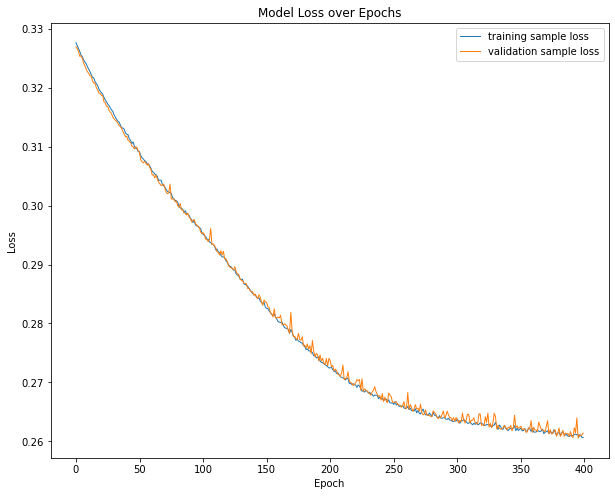

In [26]:
learningCurve(history)

In [27]:
features_val.shape

(98769, 16)

In [28]:
labels_pred = model.predict(features_val)

In [29]:
def makeRoc(features_val, labels_val, labels, model, outputDir='', outputSuffix=''):
    from sklearn.metrics import roc_curve, auc
    labels_pred = model.predict(features_val)
    df = pd.DataFrame()
    fpr = {}
    tpr = {}
    auc1 = {}
    plt.figure(figsize=(10,8))       
    for i, label in enumerate(labels):
        df[label] = labels_val[:,i]
        df[label + '_pred'] = labels_pred[:,i]
        fpr[label], tpr[label], threshold = roc_curve(df[label],df[label+'_pred'])
        auc1[label] = auc(fpr[label], tpr[label])
        plt.plot(fpr[label],tpr[label],label='%s tagger, AUC = %.1f%%'%(label.replace('j_',''),auc1[label]*100.))
    plt.plot([0, 1], [0, 1], lw=1, color='black', linestyle='--')
    #plt.semilogy()
    plt.xlabel("Background Efficiency")
    plt.ylabel("Signal Efficiency")
    plt.xlim([-0.05, 1.05])
    plt.ylim(0.001,1.05)
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.figtext(0.25, 0.90,'LSTM ROC Curve',fontweight='bold', wrap=True, horizontalalignment='right', fontsize=14)
    #plt.figtext(0.35, 0.90,'preliminary', style='italic', wrap=True, horizontalalignment='center', fontsize=14) 
    #plt.savefig('%sROC_%s.pdf'%(outputDir, outputSuffix))
    return labels_pred

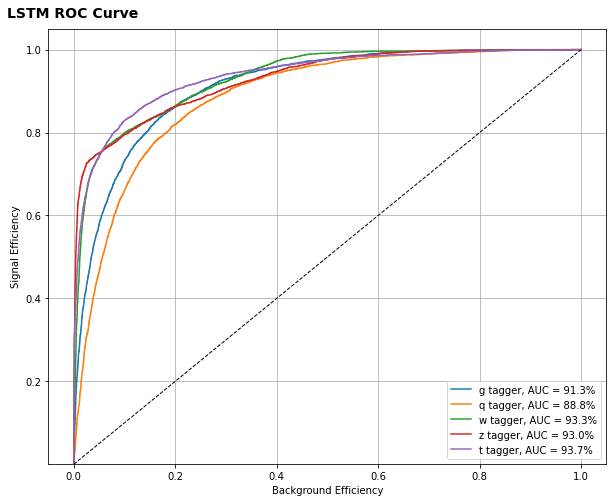

In [30]:
y_pred = makeRoc(X_test, y_test, labels, model, outputSuffix='two-layer')

In [15]:

model.save('model.h5')